# Heart disease prediction

In [28]:
import pandas as pd
import numpy as np

## Load data

In [2]:
Heart_disease=pd.read_csv('Heart_Disease_Prediction.csv')
Heart_disease.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
# df.columns  # Two Ways to print the columns of dataset
for column in Heart_disease.columns:
    print(column)

Age
Sex
Chest pain type
BP
Cholesterol
FBS over 120
EKG results
Max HR
Exercise angina
ST depression
Slope of ST
Number of vessels fluro
Thallium
Heart Disease


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# df['Heart Disease'].replace({'Presence':'1','Absence':'0'},inplace=True)  # First Way to convert string into numbers
from sklearn.preprocessing import LabelEncoder  # Second way to convert string into numbers
Lbl=LabelEncoder()
Heart_disease["Heart Disease"]=Lbl.fit_transform(Heart_disease['Heart Disease'])

In [6]:
Heart_disease

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


# Data Visualization

## Age Distribution by Sex and Heart Disease

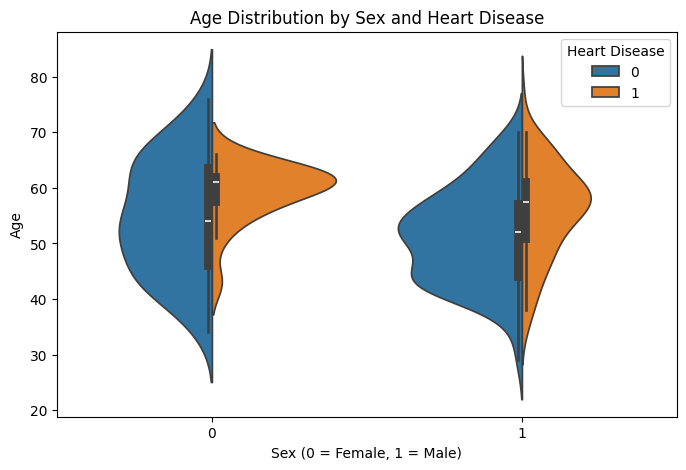

In [7]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Sex', y='Age', hue='Heart Disease', data=Heart_disease, split=True)
plt.title('Age Distribution by Sex and Heart Disease')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Age')
plt.show()


## bar plot showing the count of male (1) and female (0)

<Axes: xlabel='Sex', ylabel='count'>

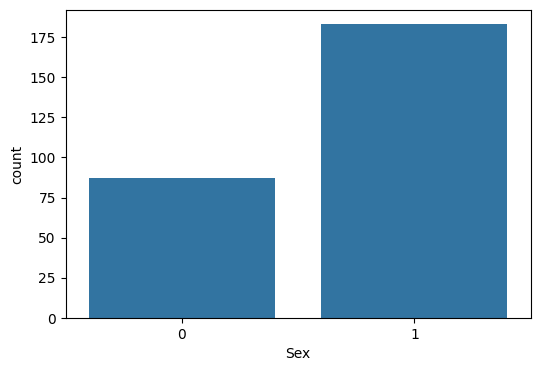

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Sex",data=Heart_disease)


## Max HR Distribution by Chest Pain Type and Heart Disease

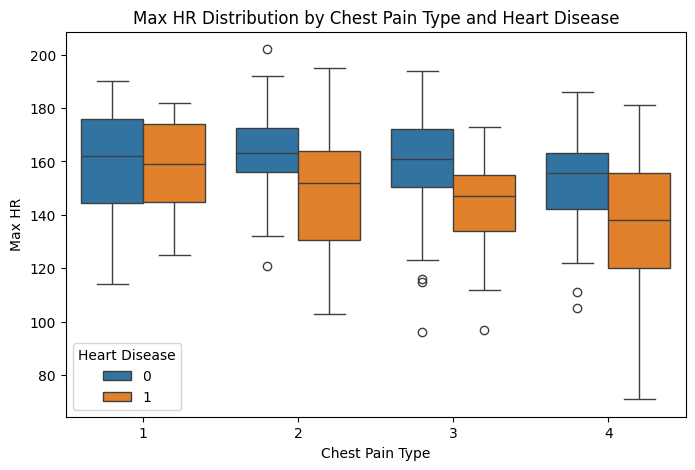

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Chest pain type', y='Max HR', hue='Heart Disease', data=Heart_disease)
plt.title('Max HR Distribution by Chest Pain Type and Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Max HR')
plt.show()


## Frequency of Exercise-Induced Angina and Heart Disease


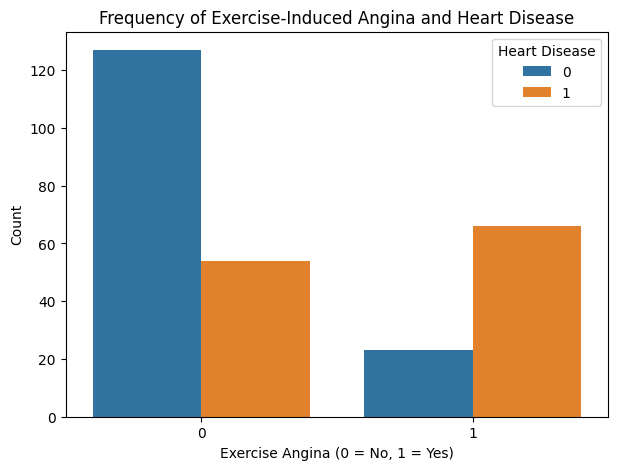

In [10]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Exercise angina', hue='Heart Disease', data=Heart_disease)
plt.title('Frequency of Exercise-Induced Angina and Heart Disease')
plt.xlabel('Exercise Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


## Create a pair plot to visualize relationships between numerical variables


<Figure size 1000x1200 with 0 Axes>

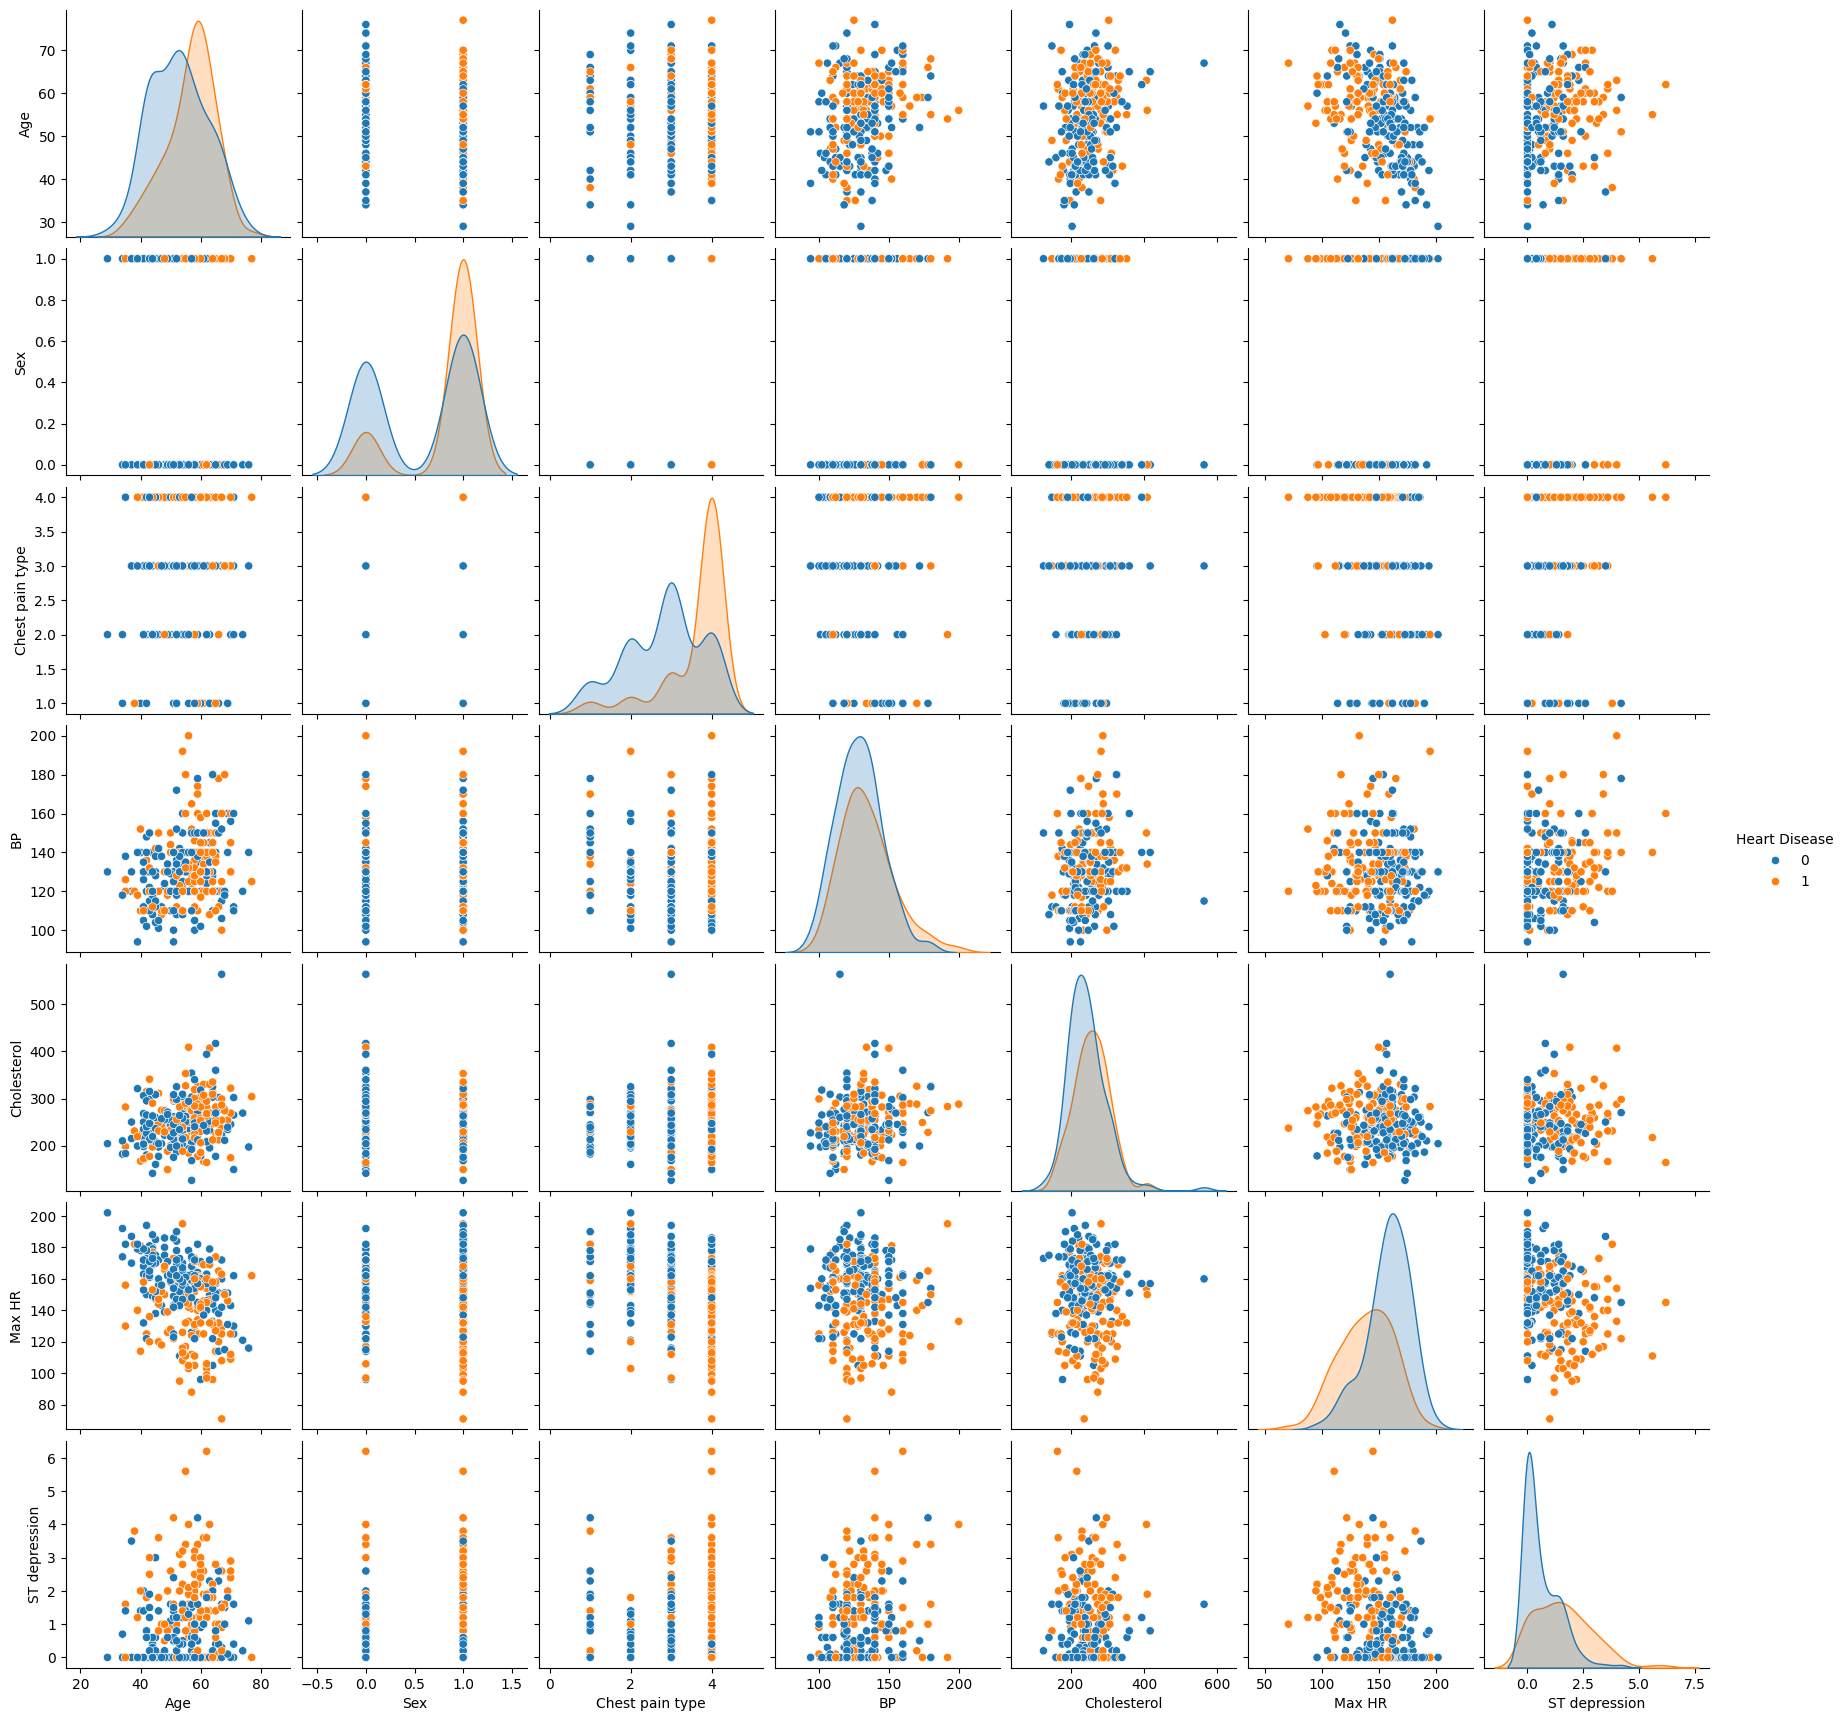

In [11]:
plt.figure(figsize=(10, 12))
sns.pairplot(Heart_disease[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Heart Disease']], hue='Heart Disease')
plt.show()

## Information about Heart disease data

In [12]:
Heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int32  
dtypes: float64(1), int32(1), i

## Correlation Heatmap: Visualize the correlation between numerical variables

Text(0.5, 1.0, 'Correlation Heatmap')

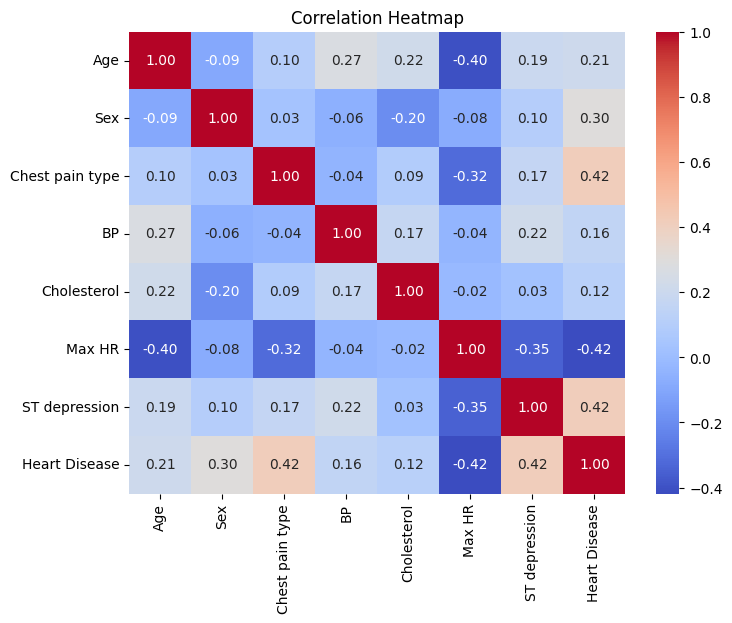

In [13]:
# Select relevant features
features = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Heart Disease']

# Compute the correlation matrix
corr_matrix = Heart_disease[features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')



## Visualize relationships between multiple variables using a pair grid.

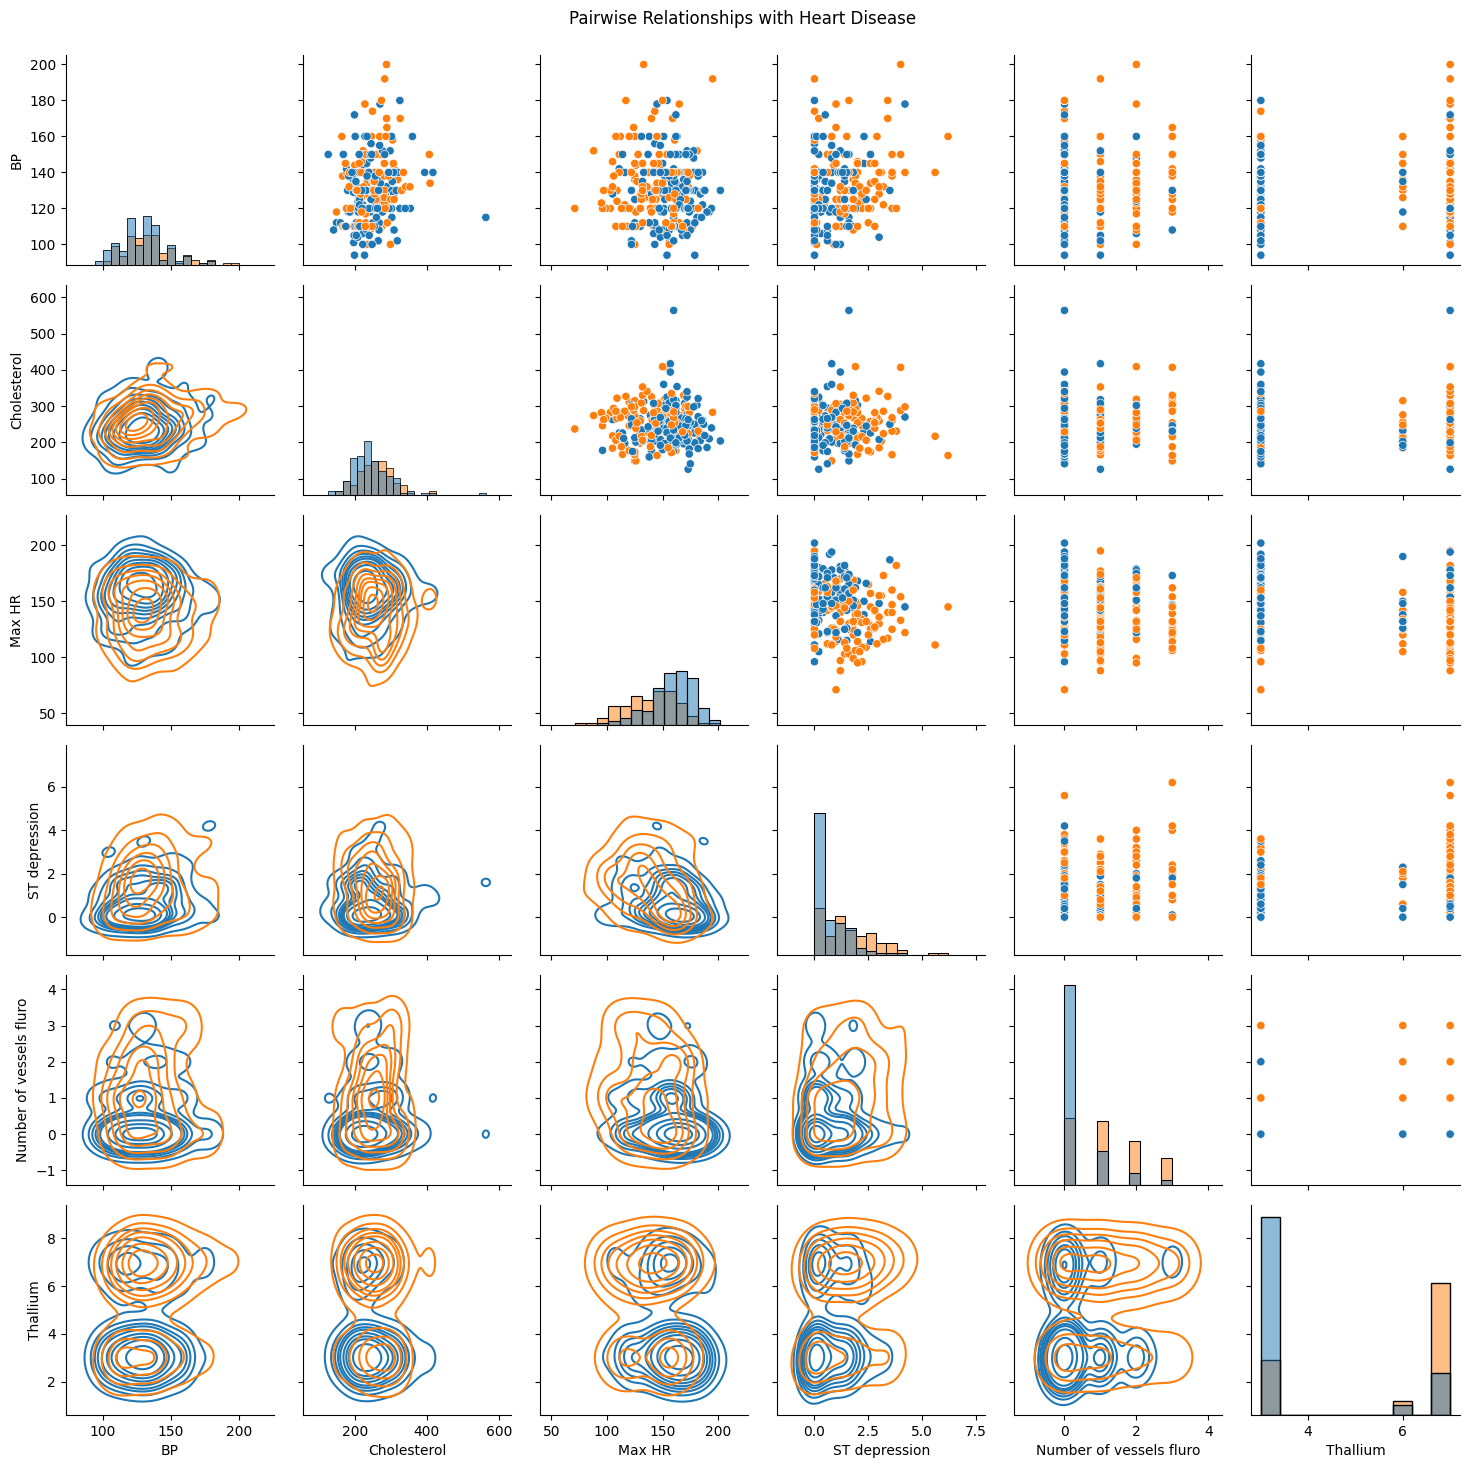

In [14]:
g = sns.PairGrid(Heart_disease[['BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro', 'Thallium', 'Heart Disease']], hue='Heart Disease')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Pairwise Relationships with Heart Disease')
plt.show()


## Count the missing values for each column

In [15]:
Heart_disease.isnull().sum()  # Two check which column has null value but here is not null value

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [16]:
Heart_disease['Heart Disease'].value_counts() # first way to find the number of disease patient
Heart_disease.value_counts('Heart Disease') # Second way to find the numbers of disease patient

Heart Disease
0    150
1    120
Name: count, dtype: int64

## Separate the features and target variables

In [17]:
X=Heart_disease.drop(['Heart Disease'],axis=1)
y=Heart_disease['Heart Disease']

## Split data into training and test 

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2) # Random_state salect the constant columns

In [20]:
len(X_test)

54

In [21]:
len(X_train)

216

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

## Train the Model

In [23]:
model.fit(X_train,y_train)

c:\Users\mcs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
model.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [25]:
model.predict([[61,1,1,134,234,0,0,145,0,2.6,2,2,3]])

c:\Users\mcs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [26]:
model.predict([[40,1,1,140,199,0,0,178,1,1.4,1,0,7]])

c:\Users\mcs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

# Model Accuracy

In [27]:
model.score(X_test,y_test)

0.8333333333333334